In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
courses = pd.read_csv('./data/courses.csv')
assessments = pd.read_csv('./data/assessments.csv')
vle = pd.read_csv('./data/vle.csv')
studentInfo = pd.read_csv('./data/studentInfo.csv')
studentRegistration = pd.read_csv('./data/studentRegistration.csv')
studentAssessment = pd.read_csv('./data/studentAssessment.csv')
studentVle = pd.read_csv('./data/studentVle.csv')

In [4]:
# 전처리 모듈

def get_year_semester(t):
    t['year'] = t.apply(lambda x: x['code_presentation'][:4], axis=1)
    t['semester'] = t.apply(lambda x: x['code_presentation'][4:], axis=1)
    pass

# 생각해볼 것들

강의 기준으로 생각해보기.\
목표 : 학생들이 어려워 하는 강의의 문제점을 파악하고 개선.


0. 가장 많이 fail, withdrawn한 강의는 뭐가 있을까?


------
0. 강의별 과제 완료율은 얼마나 될까?

0. 유저별로 VLE와 상호작용한 비율은 얼마나 될까?

0. 끝까지 마무리를 하는 학생들의 특징은 뭘까?
    - 등록 취소된 경우 몇일만에 등록을 취소할까?
    - 
0. 끝까지 수업을 마치지 못한 학생들은 어떤 것까지 하고 멈췄을까?
    - 
0. 성적이 좋은 학생들의 특징은 뭘까?
    - Fail인 학생들의 과제 완료율은 어떻게 될까?
    - Fail인 학생들의 과제 스코어는 어떻게 될까?
    - VLE 상호작용 비율은 얼마나 될까?

---

## 가장 많이 fail, withdrawn한 강의는 뭐가 있을까?

[참고] distinction은 85~100점 사이를 받은 우수학생들.\
<https://www.classcentral.com/report/open-university-insiders-perspective/>

In [5]:
get_year_semester(studentInfo)
pfPercentageByPresentation = pd.pivot_table(studentInfo, index=['code_module', 'code_presentation', 'year', 'semester'], columns='final_result', values='id_student', aggfunc='count').reset_index()
pfPercentageByPresentation['all'] = pfPercentageByPresentation['Distinction'] + pfPercentageByPresentation['Pass'] + pfPercentageByPresentation['Fail'] + pfPercentageByPresentation['Withdrawn']
pfPercentageByPresentation['over_pass%'] = (pfPercentageByPresentation['Distinction'] + pfPercentageByPresentation['Pass']) / pfPercentageByPresentation['all']
pfPercentageByPresentation['fail%'] = pfPercentageByPresentation['Fail'] / pfPercentageByPresentation['all']
pfPercentageByPresentation['withdrawn%'] = pfPercentageByPresentation['Withdrawn'] / pfPercentageByPresentation['all']

In [13]:
# pfPercentageByPresentation

### 년도별, 학기별 over_pass, fail, withdrawn 평균

- 2014년에 2013년보다 fail 비율이 낮아지고, withdrawn 비율이 높아졌다.
- B학기 일때가 J학기 일때보다 fail, withdrawn 비율이 높다.

In [7]:
pfPercentageByPresentation.groupby('year').mean()

final_result,Distinction,Fail,Pass,Withdrawn,all,over_pass%,fail%,withdrawn%
year,,,,,,,,
2013,119.555556,360.222222,610.444444,413.000000,1503.222222,0.515951,0.232505,0.251545
2014,149.846154,293.076923,528.230769,495.307692,1466.461538,0.491515,0.206262,0.302223


In [8]:
pfPercentageByPresentation.groupby('semester').mean()

final_result,Distinction,Fail,Pass,Withdrawn,all,over_pass%,fail%,withdrawn%
semester,,,,,,,,
B,123.444444,341.555556,482.444444,440.111111,1387.555556,0.448648,0.249579,0.301773
J,147.153846,306.000000,616.846154,476.538462,1546.538462,0.538109,0.194442,0.267449


### 중도포기율 높은 강의 순으로 체크

- CCC 모듈은 학기에 상관 없이 중도 포기하는 비율이 높음.
- DDD 모듈도 전체적으로 중도포기율이 높은 편, 2014B 학기에 전년 같은 학기 대비 중도 포기 비율이 7% 증가. fail 비율은 7% 감소.
- FFF 모듈은 년도별, 학기별로 편차가 심한편. 같은 학기 비교해보면 Fail은 소폭 감소, Withdrawn 비율 증가.

In [9]:
pfPercentageByPresentation = pfPercentageByPresentation.sort_values(by='withdrawn%', ascending=False).reset_index(drop=True)
# pfPercentageByPresentation = pfPercentageByPresentation.sort_values(by=['code_module', 'semester', 'withdrawn%'], ascending=False).reset_index(drop=True)
pfPercentageByPresentation

final_result,code_module,code_presentation,year,semester,Distinction,Fail,Pass,Withdrawn,all,over_pass%,fail%,withdrawn%
0,CCC,2014B,2014,B,192,375,471,898,1936,0.342459,0.193698,0.463843
1,CCC,2014J,2014,J,306,406,709,1077,2498,0.406325,0.162530,0.431145
2,DDD,2014B,2014,B,119,259,360,490,1228,0.390065,0.210912,0.399023
3,FFF,2014J,2014,J,258,393,859,855,2365,0.472304,0.166173,0.361522
4,DDD,2014J,2014,J,112,364,680,647,1803,0.439268,0.201886,0.358846
5,DDD,2013J,2013,J,98,428,731,681,1938,0.427761,0.220846,0.351393
6,DDD,2013B,2013,B,54,361,456,432,1303,0.391404,0.277053,0.331543
7,BBB,2014J,2014,J,180,391,972,749,2292,0.502618,0.170593,0.326789
8,FFF,2014B,2014,B,107,384,547,462,1500,0.436000,0.256000,0.308000
9,BBB,2014B,2014,B,166,396,561,490,1613,0.450713,0.245505,0.303782


### Fail 비율 높은 강의 순으로 체크

- GGG 모듈은 중도 포기율은 매우 낮은 반면 fail 비율이 상대적으로 높음.
- DDD 모듈은 중도포기율도 꽤 높고 fail 비율도 높음. 2013B일때 무슨 일이 있었던 걸까?
- 중도 포기율 기준으로 확인할 때는 학기(B/J)가 고루고루 섞여있었는데 Fail 기준으로 정렬하니 B학기가 상위에 압도적으로 많고 J학기가 압도적으로 하위에 몰려있음.
- 2014년도보다 2013년도 presentation이 더 fail 비율이 높은 모듈은 AAA 하나밖에 없음.
- 위에서 년도별로 체크했던 것과 같이 2013년 대비 2014년에 fail 비율이 낮아지고 중도포기 비율이 높아진 것으로 보임.

In [10]:
pfPercentageByPresentation = pfPercentageByPresentation.sort_values(by='fail%', ascending=False).reset_index(drop=True)
pfPercentageByPresentation

final_result,code_module,code_presentation,year,semester,Distinction,Fail,Pass,Withdrawn,all,over_pass%,fail%,withdrawn%
0,GGG,2013J,2013,J,141,294,451,66,952,0.621849,0.308824,0.069328
1,GGG,2014B,2014,B,128,255,350,100,833,0.573830,0.306122,0.120048
2,DDD,2013B,2013,B,54,361,456,432,1303,0.391404,0.277053,0.331543
3,FFF,2013B,2013,B,118,421,664,411,1614,0.484511,0.260843,0.254647
4,BBB,2013B,2013,B,155,459,648,505,1767,0.454443,0.259762,0.285795
5,FFF,2014B,2014,B,107,384,547,462,1500,0.436000,0.256000,0.308000
6,BBB,2014B,2014,B,166,396,561,490,1613,0.450713,0.245505,0.303782
7,GGG,2014J,2014,J,127,179,317,126,749,0.592790,0.238985,0.168224
8,EEE,2014B,2014,B,72,164,285,173,694,0.514409,0.236311,0.249280
9,BBB,2013J,2013,J,176,521,896,644,2237,0.479213,0.232901,0.287886


### 추가 체크 필요한 내용

1. 같은 년도에 다른 학기에 구성된 강의들의 차이점을 파악해본다.
2. withdrawn 비율 기준 상위 5개, 하위 5개 presentation의 차이점을 파악해본다.
3. fail 비율이 높은 강의 상위 5개, 하위 5개 presentation의 차이점을 파악해본다.

**세부내용**
- 과제구성, 강의 머테리얼 구성 확인
- 유저들의 인터렉션이 얼마나 다른지 확인

---

## 같은 년도, 다른 학기에 구성된 강의 차이점 파악
- 과제구성, 강의 머테리얼 구성 확인

과제 구성이 변경된 경우는 아래 두개 케이스 밖에 없음. 해당 구간의 눈에 띄는 데이터 변화는 withdrawn 비율보다는 fail 비율인 것으로 보임.
- BBB, 2014B -> 2014J로 갈때 CMA 테스트가 없어짐.
- DDD, 2013B -> 2013J로 갈때 CMA 테스트 없어짐.

In [11]:
moduleAssessments = pd.pivot_table(assessments, index=['code_module', 'code_presentation'], columns='assessment_type', values='id_assessment', aggfunc='count')
moduleAssessments.reset_index()

assessment_type,code_module,code_presentation,CMA,Exam,TMA
0,AAA,2013J,NaN,1.0,5.0
1,AAA,2014J,NaN,1.0,5.0
2,BBB,2013B,5.0,1.0,6.0
3,BBB,2013J,5.0,1.0,6.0
4,BBB,2014B,5.0,1.0,6.0
5,BBB,2014J,NaN,1.0,5.0
6,CCC,2014B,4.0,2.0,4.0
7,CCC,2014J,4.0,2.0,4.0
8,DDD,2013B,7.0,1.0,6.0
9,DDD,2013J,NaN,1.0,6.0


----

## withdrawn한 비율이 높은 강의 특징 확인

[참고] 학생들이 강의를 중도 포기하는 이유에 대한 연구
- <https://www.southeastern.edu/admin/ir/about_us/presentations/sair_2003.pdf> : withdrawn 하는 이유들을 대략적으로 알 수 있음. 어떤 요인이 있으면 중도포기를 하지 않을 것 같은지도 파악.
- <https://www.zionandzion.com/research/college-students-are-dropping-classes-how-often-and-why/> : withdrawn 하는 학생들의 데모그라픽 특징을 알 수 있음.


1. **상위 5개 강의**
    - CCC, 2014B
    - CCC, 2014J
    - DDD, 2014B
    - FFF, 2014J
    - DDD, 2014J


2. **하위 5개 강의**
    - GGG, 2013J
    - GGG, 2014B
    - AAA, 2013J
    - GGG, 2014J
    - AAA, 2014J


3. **중도포기 확인 내용**
    - CCC 모듈은 학기에 상관 없이 중도 포기하는 비율이 높음.
    - DDD 모듈도 전체적으로 중도포기율이 높은 편, 2014B 학기에 전년 같은 학기 대비 중도 포기 비율이 7% 증가. fail 비율은 7% 감소.
    - FFF 모듈은 년도별, 학기별로 편차가 심한편. 같은 학기 비교해보면 Fail은 소폭 감소, Withdrawn 비율 증가.

In [ ]:
pfPercentageByPresentation = pfPercentageByPresentation[['code_module', 'code_presentation', 'over_pass%', 'fail%', 'withdrawn%']]
pfPercentageByPresentation.head()

### course의 길이 때문에 포기하는 것은 아닐까

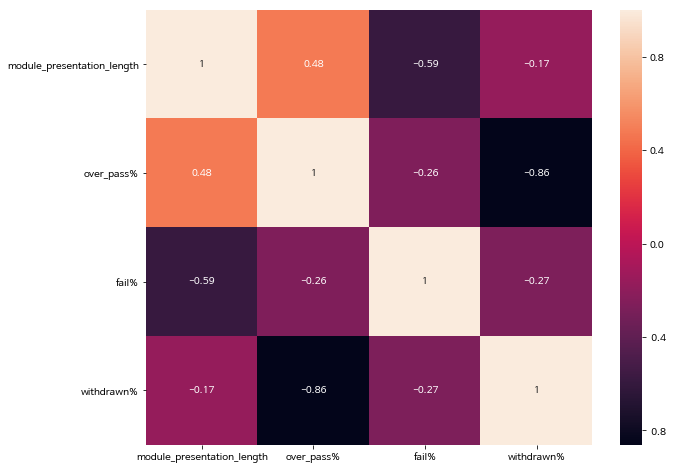

In [112]:
coursesTables = courses.merge(pfPercentageByPresentation, on=['code_module', 'code_presentation'])

plt.figure(figsize=(10, 8))
sns.heatmap(coursesTables.corr(method='pearson'), annot=True)
plt.show()

### Assessments 기준으로 확인
- Assessments 갯수
- Assessments 제출완료율

In [146]:
assessmentsGroupby = assessments.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index()
assessmentsPivot = assessmentsGroupby.pivot_table(index=['code_module', 'code_presentation'], columns = 'assessment_type', values='id_assessment').merge(registrationGroup[['code_module', 'code_presentation', 'withdrawn%']], on=['code_module', 'code_presentation'])
assessmentsPivot.head()

,code_module,code_presentation,CMA,Exam,TMA,withdrawn%
0,AAA,2013J,NaN,1.0,5.0,0.156658
1,AAA,2014J,NaN,1.0,5.0,0.180822
2,BBB,2013B,5.0,1.0,6.0,0.285795
3,BBB,2013J,5.0,1.0,6.0,0.287886
4,BBB,2014B,5.0,1.0,6.0,0.303782


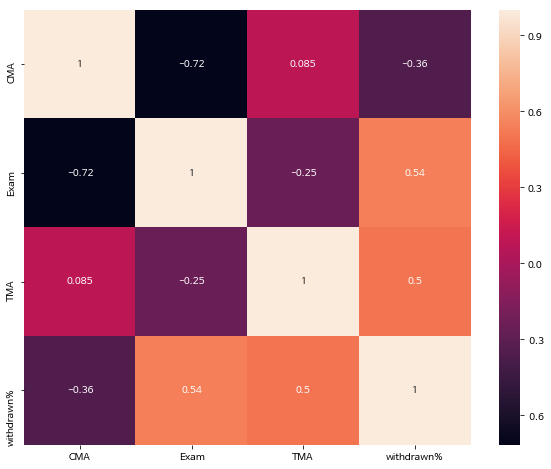

In [147]:
plt.figure(figsize=(10, 8))
sns.heatmap(assessmentsPivot.corr(method='pearson'), annot=True)
plt.show()

In [133]:
assessmentLogs = studentAssessment.merge(assessments, on='id_assessment')
assessmentLogsGroupby = assessmentLogs.groupby(['id_student', 'code_module', 'code_presentation', 'assessment_type'])['id_assessment'].nunique().reset_index()
assessmentLogsGroupby.head()

,id_student,code_module,code_presentation,assessment_type,id_assessment
0,6516,AAA,2014J,TMA,5
1,8462,DDD,2013J,TMA,3
2,8462,DDD,2014J,TMA,4
3,11391,AAA,2013J,TMA,5
4,23629,BBB,2013B,CMA,2


In [140]:
assessmentLogsGroupby.merge(assessmentsGroupby, on=['code_module', 'code_presentation', 'assessment_type'])

,id_student,code_module,code_presentation,assessment_type,id_assessment_x,id_assessment_y
0,6516,AAA,2014J,TMA,5,5
1,24734,AAA,2014J,TMA,5,5
2,26192,AAA,2014J,TMA,5,5
3,28061,AAA,2014J,TMA,5,5
4,31600,AAA,2014J,TMA,5,5
...,...,...,...,...,...,...
44874,2654928,EEE,2014J,TMA,4,4
44875,2663195,EEE,2014J,TMA,4,4
44876,2681277,EEE,2014J,TMA,1,4
44877,2686053,EEE,2014J,TMA,4,4


In [153]:
assessmentPercentages = assessmentLogsGroupby.merge(assessmentsGroupby, on=['code_module', 'code_presentation', 'assessment_type']).rename(columns={'id_assessment_x' : 'done_cnts', 'id_assessment_y' : 'all_cnts'})
assessmentPercentages['done%'] = assessmentPercentages['done_cnts'] / assessmentPercentages['all_cnts']
assessmentPercentages.head()

,id_student,code_module,code_presentation,assessment_type,done_cnts,all_cnts,done%
0,6516,AAA,2014J,TMA,5,5,1.0
1,24734,AAA,2014J,TMA,5,5,1.0
2,26192,AAA,2014J,TMA,5,5,1.0
3,28061,AAA,2014J,TMA,5,5,1.0
4,31600,AAA,2014J,TMA,5,5,1.0


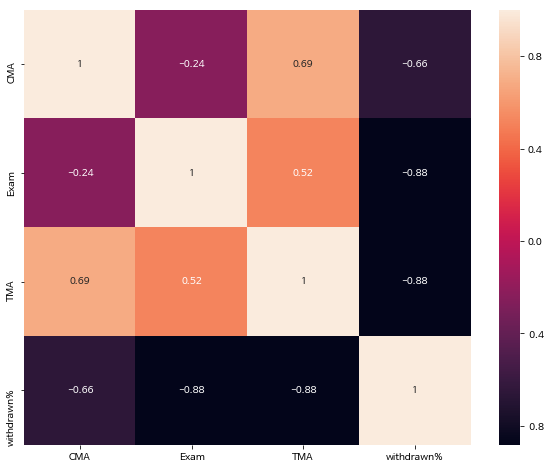

In [155]:
assessmentPivot = assessmentPercentages.pivot_table(index=['code_module', 'code_presentation'], columns='assessment_type', values='done%', aggfunc='mean')
assessmentPivot = assessmentPivot.merge(registrationGroup[['code_module', 'code_presentation', 'withdrawn%']], on=['code_module', 'code_presentation'])

plt.figure(figsize=(10, 8))
sns.heatmap(assessmentPivot.corr(method='pearson'), annot=True)
plt.show()

### VLE 기준으로 확인
- vle 컨텐츠가 너무 많아서 그런지
- vle 머테리얼들과 유저들이 상호작용을 잘 안해서 그런건지

In [77]:
pfPercentageByPresentation.head()

final_result,code_module,code_presentation,over_pass%,fail%,withdrawn%
0,GGG,2013J,0.621849,0.308824,0.069328
1,GGG,2014B,0.573830,0.306122,0.120048
2,DDD,2013B,0.391404,0.277053,0.331543
3,FFF,2013B,0.484511,0.260843,0.254647
4,BBB,2013B,0.454443,0.259762,0.285795


In [78]:
vleGroupby = vle.groupby(['code_module', 'code_presentation', 'activity_type'])['id_site'].count().reset_index()
vleGroupby.head()

,code_module,code_presentation,activity_type,id_site
0,AAA,2013J,dataplus,4
1,AAA,2013J,forumng,15
2,AAA,2013J,glossary,2
3,AAA,2013J,homepage,1
4,AAA,2013J,oucollaborate,2


In [124]:
vleLogs = studentVle.merge(vle, on=['code_module', 'code_presentation', 'id_site'])
vleLogsGroupby = vleLogs.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])['id_site'].nunique().reset_index()
vleLogsGroupby.head()

,id_student,code_module,code_presentation,activity_type,id_site
0,6516,AAA,2014J,dataplus,3
1,6516,AAA,2014J,forumng,5
2,6516,AAA,2014J,homepage,1
3,6516,AAA,2014J,oucontent,50
4,6516,AAA,2014J,resource,15


In [87]:
vlePercentages = vleLogsGroupby.merge(vleGroupby, on=['code_module', 'code_presentation', 'activity_type']).rename(columns={'id_site_x' : 'done_cnts', 'id_site_y' : 'all_cnts'})
vlePercentages['done%'] = vlePercentages['done_cnts'] / vlePercentages['all_cnts']
vlePercentages.head()

,id_student,code_module,code_presentation,activity_type,done_cnts,all_cnts,done%
0,6516,AAA,2014J,dataplus,3,4,0.75
1,26192,AAA,2014J,dataplus,2,4,0.50
2,28061,AAA,2014J,dataplus,2,4,0.50
3,52765,AAA,2014J,dataplus,1,4,0.25
4,58071,AAA,2014J,dataplus,2,4,0.50


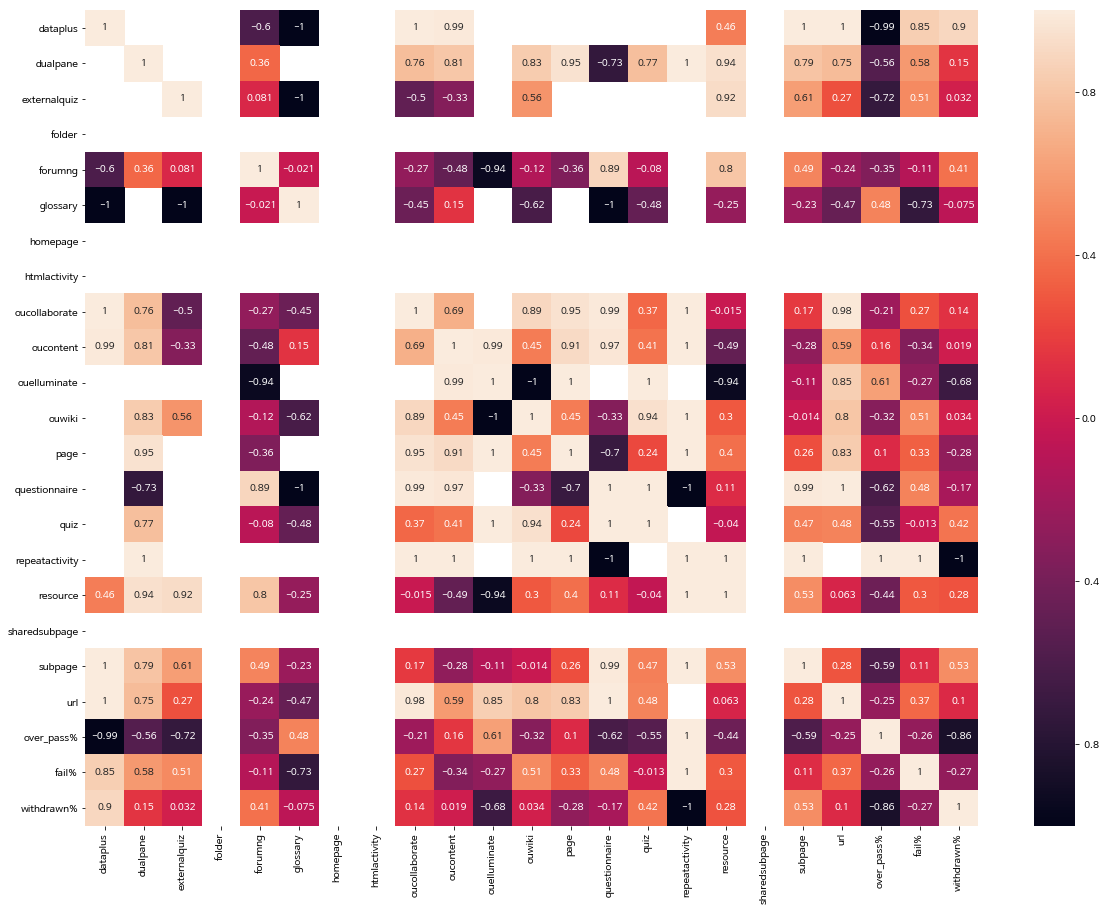

In [108]:
vlePivot = vle.pivot_table(index=['code_module', 'code_presentation'], columns='activity_type', values='id_site', aggfunc='count').reset_index()
vlePivot = vlePivot.merge(registrationGroup[['code_module', 'code_presentation', 'over_pass%', 'fail%', 'withdrawn%']], on=['code_module', 'code_presentation'])

plt.figure(figsize=(20, 15))
sns.heatmap(vlePivot.corr(method='pearson'), annot=True)
plt.show()

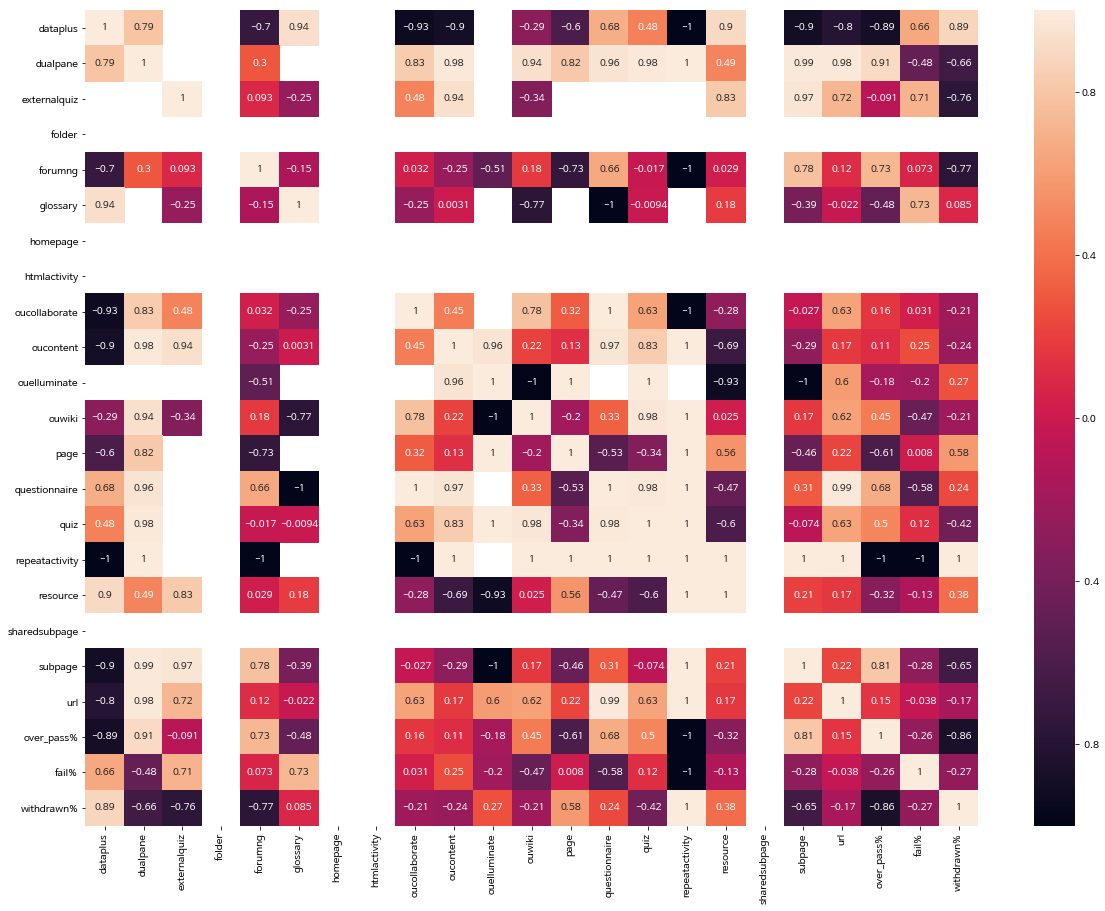

In [109]:
vlePercentages = vlePercentages.pivot_table(index=['code_module', 'code_presentation'], columns='activity_type', values='done%', aggfunc='mean')
vlePercentages = vlePercentages.merge(registrationGroup[['code_module', 'code_presentation', 'over_pass%', 'fail%', 'withdrawn%']], on=['code_module', 'code_presentation'])

plt.figure(figsize=(20, 15))
sns.heatmap(vlePercentages.corr(method='pearson'), annot=True)
plt.show()